Среднеквадратичная ошибка (MSE): 2997.54
Коэффициент детерминации (R^2): 0.43


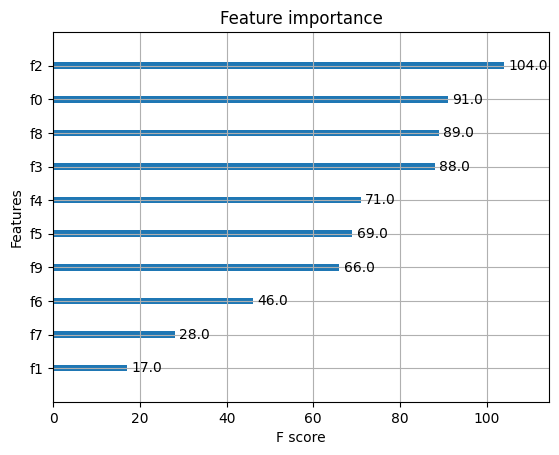

In [7]:
# Импорт необходимых библиотек
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# Загрузка набора данных Diabetes
diabetes = load_diabetes()
X = diabetes.data  # Признаки
y = diabetes.target  # Целевая переменная (прогрессия заболевания)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Функция потерь для регрессии
    n_estimators=100,              # Количество деревьев
    learning_rate=0.1,             # Скорость обучения
    max_depth=3,                   # Максимальная глубина дерева
    subsample=0.8,                 # Доля выборки для обучения каждого дерева
    colsample_bytree=0.8,          # Доля признаков для обучения каждого дерева
    random_state=42                # Для воспроизводимости
)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# Визуализация важности признаков
xgb.plot_importance(model)
plt.show()